In [0]:
import pandas as pd
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
train_df=pd.read_csv('bank-additional-full.csv')

In [27]:
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [0]:
dic={'no':0, 'yes':1}
train_df['y']=train_df['y'].map(dic)

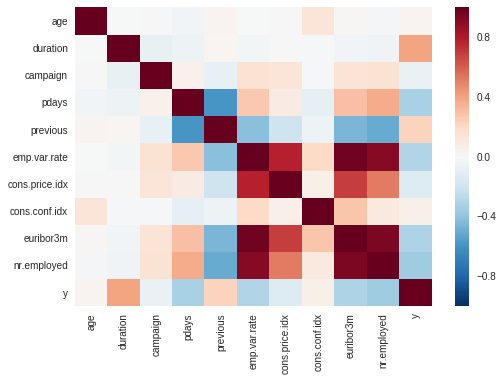

In [30]:
import seaborn as sns
sns.heatmap(train_df.corr())

In [0]:
cat_cols=['job', 'education', 'day_of_week', 'marital', 'default', 'housing', 'contact', 'loan', 'poutcome', 'month']
for col in cat_cols:
  dummies_1 = pd.get_dummies(train_df.loc[:, col], prefix=col)  
  train_df = pd.concat([train_df, dummies_1], axis = 1)
  train_df = train_df.drop(col, axis =1)

In [20]:
train_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,0,0


In [22]:
train_df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [23]:
num_folds = 5
features = [c for c in train_df.columns if c not in ['y']]
folds=StratifiedKFold(n_splits=num_folds, shuffle=False, random_state=2319)
oof = np.zeros(len(train_df))
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, train_df['y'].values)):
  X_train, y_train = train_df.iloc[trn_idx][features], train_df['y'].iloc[trn_idx]
  X_valid, y_valid = train_df.iloc[val_idx][features], train_df['y'].iloc[val_idx]
  lg=LogisticRegression()
  lg.fit(X_train.values, y_train.values)
  oof[val_idx]=lg.predict(X_valid.values)
  print('Fold score:', accuracy_score(y_valid.values, lg.predict(X_valid)))
print('Total score:', accuracy_score(train_df['y'].values, oof))  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold score: 0.8937848992473901


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold score: 0.898761835396941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold score: 0.9047098810390871


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold score: 0.8724050018210514


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold score: 0.6945489862814131
Total score: 0.852845488977372


In [37]:
num_folds = 5
features = [c for c in train_df.columns if c not in ['y']]
folds=StratifiedKFold(n_splits=num_folds, shuffle=False, random_state=2319)
oof = np.zeros(len(train_df))
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, train_df['y'].values)):
  X_train, y_train = train_df.iloc[trn_idx][features], train_df['y'].iloc[trn_idx]
  X_valid, y_valid = train_df.iloc[val_idx][features], train_df['y'].iloc[val_idx]
  lg=DecisionTreeClassifier(random_state=42, max_depth=1)
  lg.fit(X_train.values, y_train.values)
  oof[val_idx]=lg.predict(X_valid.values)
  print('Fold score:', accuracy_score(y_valid.values, lg.predict(X_valid)))
print('Total score:', accuracy_score(train_df['y'].values, oof))

Fold score: 0.8873512988589464
Fold score: 0.8873512988589464
Fold score: 0.8873512988589464
Fold score: 0.8873376229209664
Fold score: 0.14434867063251183
Total score: 0.7387588618044091


In [40]:
num_folds = 5
features = [c for c in train_df.columns if c not in ['y']]
folds=StratifiedKFold(n_splits=num_folds, shuffle=False, random_state=2319)
oof = np.zeros(len(train_df))
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, train_df['y'].values)):
  X_train, y_train = train_df.iloc[trn_idx][features], train_df['y'].iloc[trn_idx]
  X_valid, y_valid = train_df.iloc[val_idx][features], train_df['y'].iloc[val_idx]
  lg=RandomForestClassifier(random_state=42, max_depth=1)
  lg.fit(X_train.values, y_train.values)
  oof[val_idx]=lg.predict(X_valid.values)
  print('Fold score:', accuracy_score(y_valid.values, lg.predict(X_valid)))
print('Total score:', accuracy_score(train_df['y'].values, oof))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fold score: 0.8873512988589464
Fold score: 0.8873512988589464


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fold score: 0.8873512988589464
Fold score: 0.8873376229209664
Fold score: 0.7369187811096273
Total score: 0.857264251723803


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
best_params = {'objective': 'binary',
              'metric':'binary_error',
              'boosting': 'gbdt',
              'feature_fraction': 0.20473494522163582,
              'learning_rate': 0.18140521566206408,
              'max_bin': 443,
              'max_depth': 4,
              'min_child_samples': 173,
              'min_data_in_leaf': 55,
              'num_leaves': 338,
              'reg_alpha': 1.0405437974574033e-08,
              'reg_lambda': 0.0024930466999141137,
              'scale_pos_weight': 1.284102299022877}

In [106]:
num_folds = 5
features = [c for c in train_df.columns if c not in ['ID_code', 'y', 'default_yes', 'marital_unknown', 'education_illiterate', 'loan_unknown', 'job_student']]

folds = StratifiedKFold(n_splits=num_folds, random_state=2319)
oof = np.zeros(len(train_df))
feature_importance_df = pd.DataFrame()

print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, train_df['y'].values)):
    
    X_train, y_train = train_df.iloc[trn_idx][features], train_df['y'].iloc[trn_idx]
    X_valid, y_valid = train_df.iloc[val_idx][features], train_df['y'].iloc[val_idx]
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    clf = lgb.train(best_params, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=20, early_stopping_rounds = 200)
    k=clf.predict(X_valid, num_iteration=clf.best_iteration)
    k[k<0.5]=0
    k[k>=0.5]=1
    oof[val_idx] = k
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    print('Fold score:', accuracy_score(y_valid.values, k))
print('Total score:', accuracy_score(train_df['y'].values, oof))  

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 200 rounds.
[20]	training's binary_error: 0.0823672	valid_1's binary_error: 0.112649
[40]	training's binary_error: 0.0778149	valid_1's binary_error: 0.112649
[60]	training's binary_error: 0.0734446	valid_1's binary_error: 0.112042
[80]	training's binary_error: 0.0720789	valid_1's binary_error: 0.112163
[100]	training's binary_error: 0.0712291	valid_1's binary_error: 0.111799
[120]	training's binary_error: 0.0701669	valid_1's binary_error: 0.111435
[140]	training's binary_error: 0.0694689	valid_1's binary_error: 0.111435
[160]	training's binary_error: 0.0680121	valid_1's binary_error: 0.111313
[180]	training's binary_error: 0.0662822	valid_1's binary_error: 0.111678
[200]	training's binary_error: 0.065129	valid_1's binary_error: 0.111435
[220]	training's binary_error: 0.0643703	valid_1's binary_error: 0.111556
[240]	training's binary_error: 0.063915	valid_1's binary_error: 0.111313
[260]	training's binary_erro

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


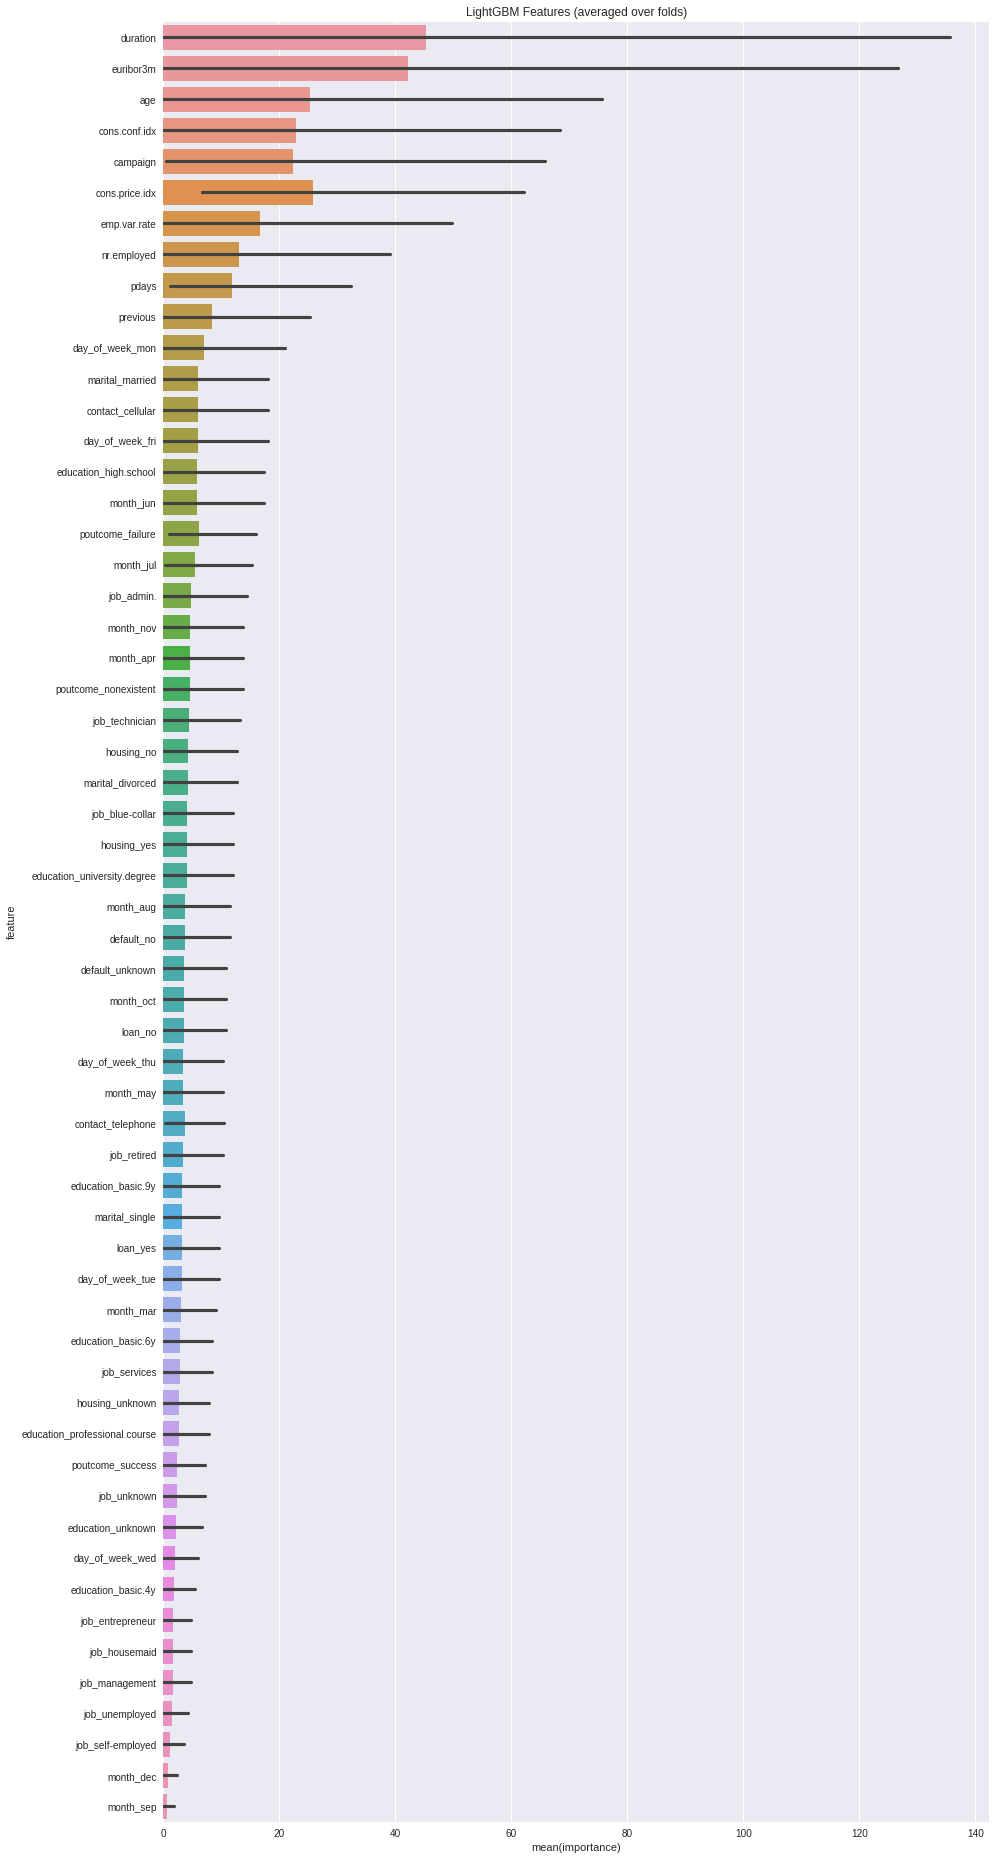

In [107]:
import matplotlib.pyplot as plt
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()